# 三層ニューラルネットワーク（Neural Network, NN）を実装する

### ゼロから始めるディープラーニング 1 （Oreilly社）の3.4節に示された三層NNのコード。

* ## 各層における信号伝達の実装

#### ここでは重みは一定で伝播するとする。

<img src='./figures/3Layer-NN.png'>

#### それぞれの層におけるニューロンの数は図の通りとする。

In [14]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLu(x):
    return np.maximum(0, x)

# 恒等関数。後ほどSoftmax関数を導入しやすくする都合上この処理を入れる。
def identity_function(x):
    return x


def init_network():
    network = {}
    # 一層目の重みとバイアスを定義
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    # 二層目の重みとバイアスを定義
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    # 三層目の重みとバイアスを定義
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

# 引数として、network（重みとバイアスの情報）、入力 xをとる
def forward(network, x):
    # 重みとバイアスの値を読み出す
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 一層目の入力を合計する
    a1 = np.dot(x, W1) + b1
    # 活性化関数（シグモイド関数）に入れて出力
    z1 = sigmoid(a1)
    # 二層目の入力を合計する（以下同様）
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    # 三層目
    a3 = np.dot(z2, W3) + b3
    # 三層目は活性化関数が異なる（ここでは恒等関数）
    y = identity_function(a3)

    return y

In [15]:
network = init_network()
# NNへの入力
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


* ## 出力層の設計

出力層の活性化関数を変更することで、分類問題と回帰問題のどちらにもNNを適用することができる。<br>
分類問題の場合 : ソフトマックス関数<br>
回帰問題の場合 : 恒等関数

* ### Softmax関数の実装
* #### Softmax関数の形

出力層が$n$個あるとして、$k$番目の出力$y_k$を求める式は以下の通り。

$$ y_k = \frac{\exp(a_k)}{\sum_{i = 1}^{n} \exp(a_i)} $$

ソフトマックス関数の出力$y_k$は確率として解釈することができる。つまり、以下の式が成り立つ。

$$ \sum_{k = 1}^{n} y_k = 1$$

In [5]:
# ソフトマックス関数の実装
a = np.array([0.3, 2.9, 4.0])

def softmax(a):
    c = np.max(a) # オーバーフロー対策
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [17]:
softmax(a).sum()

1.0

#### 確かにソフトマックス関数の出力値の和は1になることが確認できた。

* ## MNISTデータセットに対する予測の適用

画像の縦横サイズ : (28, 28)


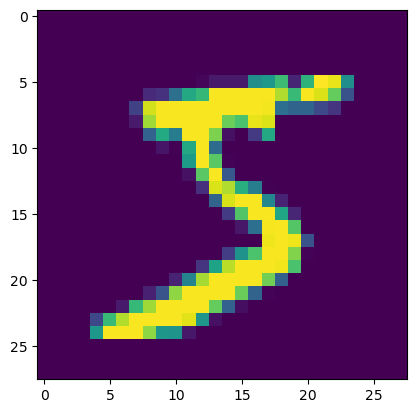

画像の正解ラベル : 5


In [6]:
import pickle
import numpy as np

data_file_path = './dataset/mnist.pkl'
# データを読み込む
# 各データはリストになっており、train_img,train_label,test_img,test_labelという名前がついている

with open(data_file_path, 'rb') as f:
    dataset = pickle.load(f)

# 画像データの中身の確認
import matplotlib.pyplot as plt

example = dataset['train_img'][0].reshape((28, 28))
ex_label = dataset['train_label'][0]

print('画像の縦横サイズ : ' + str(example.shape))
plt.imshow(example)
plt.show()

print('画像の正解ラベル : ' + str(ex_label))

In [8]:
# そのままでは行列の形が合わないのでラベルをOne-Hot表現に変更
def to_one_hot(label):
    T = np.zeros((label.size, 10))
    for i in range(label.size):
        T[i][label[i]] = 1
    return T

dataset['train_label'] = to_one_hot(dataset['train_label'])
dataset['train_label'].shape    #-> (60000, 10)

(60000, 10)

In [20]:
# 正規化を行う
dataset['train_img'] = dataset['train_img'] / 255.0
dataset['train_label'] = dataset['train_label'] / 255.0
dataset['test_img'] = dataset['test_img'] / 255.0
dataset['test_label'] = dataset['test_label'] / 255.0

#### 入力層のニューロンをを784個、出力層のニューロンを10個（0~9の文字に対応）用意する。<br>一つ目の隠れ層のニューロンの個数を50個、二つ目を100個に設定する。

In [22]:
def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickel.load(f)

def predict(network, x):
    # 重みとバイアスの値を読み出す
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 一層目の入力を合計する
    a1 = np.dot(x, W1) + b1
    # 活性化関数（シグモイド関数）に入れて出力
    z1 = sigmoid(a1)
    # 二層目の入力を合計する（以下同様）
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    # 三層目
    a3 = np.dot(z2, W3) + b3
    # 三層目は活性化関数が異なる
    y = softmax(a3)

    return y

In [14]:
x, t = dataset['train_img'], dataset['train_label']
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print('Accuracy : ' + str(float(accuracy_int) / len(x)))

FileNotFoundError: [Errno 2] No such file or directory: 'sample_weight.pkl'